<a href="https://colab.research.google.com/github/leobioinf0/jump2digital2022_DataScience/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries <a class="anchor" id="4"></a>



We can see that the input folder contains one input file named `heart.csv`.

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

I have imported the libraries. The next step is to import the datasets.

## Import dataset <a class="anchor" id="5"></a>


In [2]:
df = pd.read_csv('https://challenges-asset-files.s3.us-east-2.amazonaws.com/Events/Jump2digital+2022/train.csv', sep=";")

## Exploratory Data Analysis <a class="anchor" id="6"></a>



#### Check shape of the dataset <a class="anchor" id="6.1"></a>


In [3]:
# print the shape
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (2100, 9)


Now, we can see that the dataset contains 2100 instances and 9 variables.

#### Preview the dataset <a class="anchor" id="6.2"></a>



In [4]:
# preview dataset
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
0,-0.458258,-0.579012,2.886009,-0.075516,1.674060,-2.431912,0.534850,-0.846473,2
1,1.626615,-0.028332,-1.443184,-1.007447,-0.989093,1.202627,-0.038211,-1.298616,0
2,1.721356,-0.137676,-1.322593,-1.333187,-0.723713,0.843285,-0.588495,0.066682,0
3,-0.715103,3.265915,-0.791030,-2.967881,2.497628,-0.277387,-0.551611,0.668354,2
4,2.944098,0.197871,-2.257025,1.032789,-4.104693,4.716115,-0.380813,-1.393825,0


#### Summary of dataset <a class="anchor" id="6.3"></a>

In [5]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  2100 non-null   float64
 1   feature2  2100 non-null   float64
 2   feature3  2100 non-null   float64
 3   feature4  2100 non-null   float64
 4   feature5  2100 non-null   float64
 5   feature6  2100 non-null   float64
 6   feature7  2100 non-null   float64
 7   feature8  2100 non-null   float64
 8   target    2100 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 147.8 KB


#### Statistical properties of dataset <a class="anchor" id="6.7"></a>

In [6]:
# statistical properties of dataset
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.318846,0.005348,-0.327567,0.024042,0.085851,-0.065000,-0.025603,-0.004437,0.985238
std,1.575061,1.605428,1.479745,1.548154,1.788543,2.124337,1.015619,1.003342,0.815098
min,-5.031501,-6.004578,-5.470794,-5.296172,-5.719499,-4.910575,-3.850552,-3.541608,0.000000
25%,-1.406249,-1.119150,-1.368208,-1.083716,-1.136441,-1.613267,-0.701442,-0.659096,0.000000
50%,-0.431219,-0.162577,-0.532158,0.152545,0.102788,-0.431328,-0.007598,-0.019797,1.000000
75%,0.773896,1.127450,0.573801,1.173172,1.507492,1.162813,0.665932,0.667530,2.000000
max,5.388387,7.663112,4.869581,4.318758,6.033273,7.053420,4.400697,3.579874,2.000000


## Missing values <a class="anchor" id="10"></a>


In [7]:
# check for missing values
df.isnull().sum()

feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
feature7    0
feature8    0
target      0
dtype: int64

#### Interpretation

We can see that there are no missing values in the dataset.

## Univariate analysis <a class="anchor" id="7"></a>



### Analysis of `target` variable <a class="anchor" id="7.1"></a>


- Our feature variable of interest is `target`.

- It refers to the 'label' that classifies the quality of the air.

- It is integer valued as it contains three integers 0, 1 and 2 - (0 stands for 'Good', 1 for 'Moderate'  and 2 for 'Dangerous').

- So, in this section, I will analyze the `target` variable. 

#### Check the number of unique values in `target` variable

In [8]:
df['target'].nunique()

3

We can see that there are 2 unique values in the `target` variable.

#### View the unique values in `target` variable

In [9]:
sorted(df['target'].unique())

[0, 1, 2]

#### Comment 

So, the unique values are 0, 1 and 2.

#### Frequency distribution of `target` variable

In [10]:
df['target'].value_counts()

0    713
1    705
2    682
Name: target, dtype: int64

#### Comment

- `0` stands for 'Good' air quality. So, there are 713 entries.
- `1` stands for 'Moderate' air quality. So, there are 705 entries.
- `2` stands for 'Dangerous' air quality. So, there are 682 entries.

#### Visualize frequency distribution of `target` variable

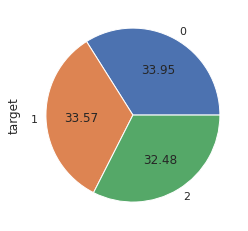

In [11]:
df['target'].value_counts().plot.pie(autopct="%.2f");

## Bivariate Analysis <a class="anchor" id="8"></a>


### Estimate correlation coefficients <a class="anchor" id="8.1"></a>

Our dataset is very small. So, I will compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. I will compute it using the `df.corr()` method as follows:-

In [12]:
df.corr()['target'].sort_values(ascending=False)

target      1.000000
feature3    0.575552
feature5    0.559652
feature4    0.015502
feature7    0.011791
feature8   -0.041792
feature2   -0.277629
feature1   -0.520489
feature6   -0.686339
Name: target, dtype: float64

### Heat Map <a class="anchor" id="9.1"></a>

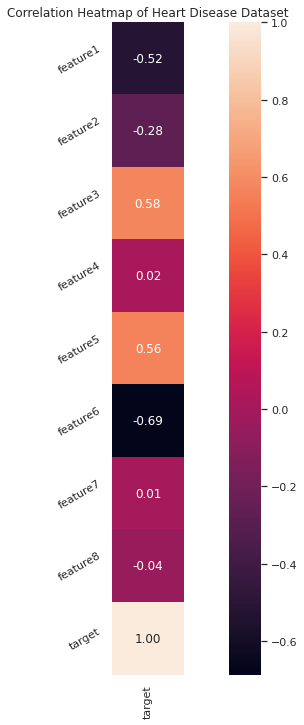

In [13]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(df.corr()[['target']], square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

#### Interpretation of correlation coefficient


- `feature3` and `feature5` variables are mildly positively correlated with `target` variable. 

- `feature1` and `feature6` variables are mildly negatively  correlated with `target` variable.




In [14]:
def label(x, color, label):
    '''
    create labels for joy plot
    '''
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,ha="left", va="center", transform=ax.transAxes)
def plot_joy(df, col, clusters):
    '''
    Create Joyplot
    '''
    sns.set_theme(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0)})
    n_clus=len(df[clusters].unique())
    # pal = sns.cubehelix_palette(n_colors=n_clus, rot=.25, light=.7)
    pal = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange', 'bright pink'])
    g = sns.FacetGrid(df, 
                        row=clusters, 
                        hue=clusters, 
                        aspect=15, height=.8, palette=pal)
    g.map(sns.kdeplot, col, bw_adjust=.8, clip_on=False, fill=True, alpha=.5, linewidth=1.5)
    g.refline(y=0, linewidth=1, linestyle="-", color=None, clip_on=False)
    g.map(label, col)
    g.figure.subplots_adjust(hspace=-.25)
    g.set_titles("")
    g.fig.suptitle("Distribution of {} in w.r.t. target".format(col))
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)
    return g

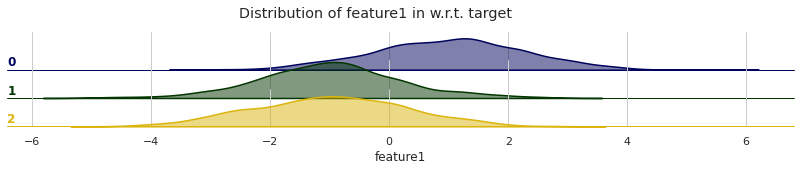

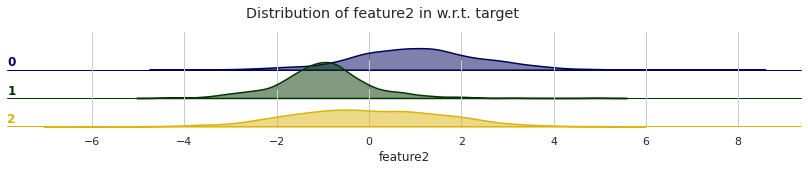

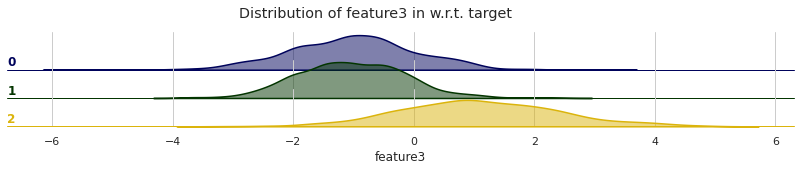

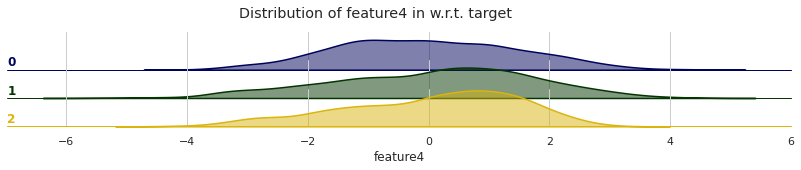

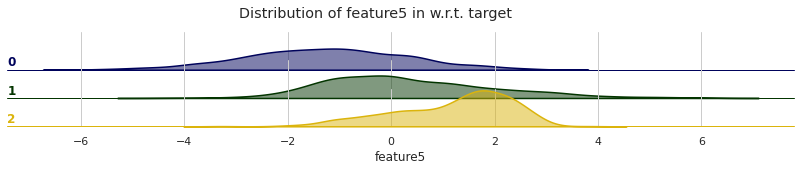

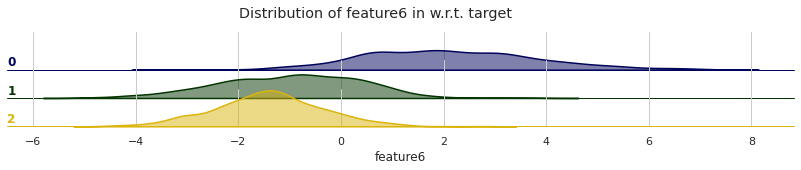

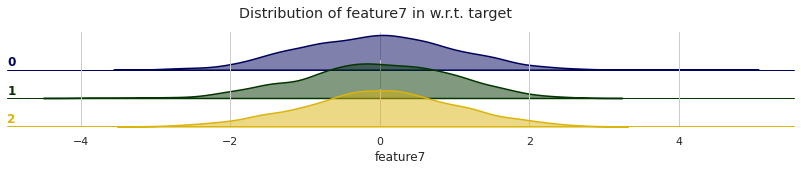

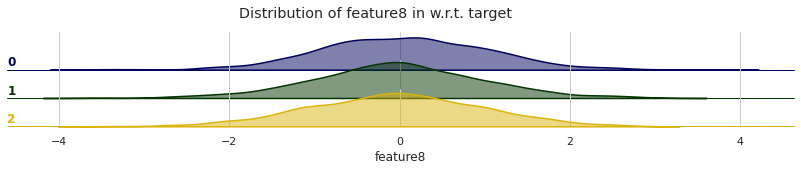

In [15]:
for col in df.columns[:-1]:
    plot_joy(df, col, "target")
    plt.show()